# 로지스틱 회귀 (logistic regression)
* 반응변수()가 범주형인 경우의 회귀분석모형
## 목적
* 예측모형
* 로지스틱 판별분석
* 사후확률(posterior probability)
* 반응변수의 범주가 0,1만 가지는 이진형(binary)인 경우
    * 로지스틱 회귀
* 반응변수의 범주가 3개 이상인 경우
    * 다범주 로직모형, 순서형 로지스틱 회귀
    * 로지스틱 회귀 : OVR, MLR

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## ▣ 예
* iris data:https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
### 설명변수(x)와 반응변수(y)
x = iris.iloc[50:,3:5]
y = iris.iloc[50:,5]
y, y_levels = pd.factorize(y)

In [ ]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [ ]:
### logistic regression
logistic = LogisticRegression()
model = logistic.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,18,1
1,0,21


* 이진 분류결과표(교차표)
    * TP(양성예측1 실제양성1), FN(음성예측0 실제양성1)
    * FP(양성예측1 실제음성0), TN(음성예측0 실제음성0)
* 평가점수
    * 정확도 : TP + TN / TP + TN + FP + FN
    * 정밀도 : TP / TP + FP
    * 재현율 : TP / TP + FN

In [ ]:
### accuracy
model.score(x_test, y_test)

0.975

* 위양성률
    * F점수

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



## ROC(Receiver Operating Characteristic) 커브

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

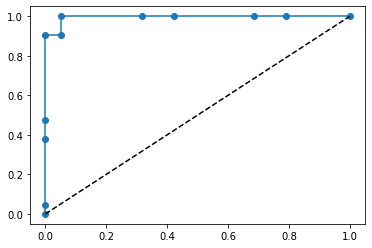

In [ ]:
f_value = model.decision_function(x_test)
p_value = model.predict_proba(x_test)[:,1]
fdr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fdr, tpr, 'o-')
plt.plot([0,1], [0,1], 'k--')
plt.show()

## ▣ 문제
* data file:https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv

In [ ]:
mtcars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
### 설명변수(x)와 반응변수(y)
x = mtcars[['mpg','am']]
y = mtcars.vs

In [ ]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [ ]:
### logistic regression
logistic = LogisticRegression()
model = logistic.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
### accuracy
model.score(x_test, y_test)

1.0

In [ ]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,9,0
1,0,4


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



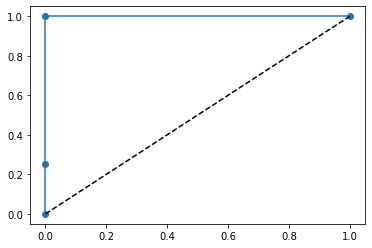

In [ ]:
f_value = model.decision_function(x_test)
p_value = model.predict_proba(x_test)[:,1]
fdr, tpr, thresholds = roc_curve(y_test, p_value)

plt.plot(fdr, tpr, 'o-')
plt.plot([0,1], [0,1], 'k--')
plt.show()